## This python notebook generates synthetic data for hospital clinic performance

1. **The synthetic data contains the following columns:**

- 'timestamp': datetime
- 'department': str
- 'patients_waiting': int
- 'wait_time': float
- 'doctors_available': int
- 'satisfaction_score': float

2. **The timestamp data is generated every hour from 12am-12am, assumption is that the clinic is open 24 hours. The data file has 30 days of data from 2025-01-01 to 2025-01-31**


3. **There are 3 departments** 
- Mood Disorders
- Memory Clinic
- Psychogeriatric Clinic

4. **At each timestamp, each department sends in information on:**
- Patients waiting (0 - 20)
- Wait time (0 - 60 min)
- Doctors available (0 - 5)
- Average satisfaction score (0-5)


5. **I have created some time series functions which follow a cyclical cosine pattern with added random noise:**
- Patients waiting and wait times is cyclical with mornings and evenings having lowest wait times and afternoons having highest
- Doctor’s available and average satisfaction score follow the opposite distribution with doctors available and satisfaction score being lowest in the afternoons and highest in the mornings and evenings

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data

In [2]:
# Create Timestamps for every hour for 31 days in Jan 2025

start_date = '2025-01-01'
end_date = '2025-01-31'

start_ts = pd.Timestamp(start_date)
end_ts = pd.Timestamp(end_date)
dti = pd.date_range(start=start_ts, end=end_ts, freq='H')

In [3]:
dti

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-30 15:00:00', '2025-01-30 16:00:00',
               '2025-01-30 17:00:00', '2025-01-30 18:00:00',
               '2025-01-30 19:00:00', '2025-01-30 20:00:00',
               '2025-01-30 21:00:00', '2025-01-30 22:00:00',
               '2025-01-30 23:00:00', '2025-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

In [4]:
# Define a cosine function that generates cyclical values with noise

def rand_cycle_data_generator(df, y_scale, y_shift, x_scale, noise_std, clip_min, clip_max, length, rounding_dp):
    
    # Define a cosine function
    y = round(y_shift + y_scale*(np.cos(df['time_of_day'].dt.hour * (2*np.pi/x_scale))),rounding_dp)
    
    # Add noise
    noise = np.round(np.random.normal(0,noise_std, size=length),rounding_dp)
    
    # Clip values at a minimum and maximum
    final_y = np.clip(y+noise, clip_min, clip_max)
    
    return final_y

In [16]:
# Define a function that plots y vs x

def plot_x_vs_y(x,y):
    plt.figure(figsize=(20, 6))
    plt.plot(x,y)

In [26]:
# Create the dataframe with 6 columns

def create_dataframe(department, dti):
    
    # Add the timestamp column
    df = pd.DataFrame(data=dti, columns = ['time_of_day'])
    
    # Generate patient wait times column
    wait_times = rand_cycle_data_generator(df=df, y_scale=-30, y_shift=30, x_scale = 24, noise_std=5, clip_min=0, clip_max=None, length=len(dti), rounding_dp = 1)
    
    # Generate number of patients waiting column
    num_patients_waiting = rand_cycle_data_generator(df=df, y_scale=-10, y_shift=10, x_scale = 24, noise_std=2, clip_min=0, clip_max=None, length=len(dti), rounding_dp = 0)
    
    # Generate number of doctors available column
    doctors_available = rand_cycle_data_generator(df=df, y_scale=2.5, y_shift=2.5, x_scale = 24, noise_std=1, clip_min=0, clip_max=5, length=len(dti), rounding_dp = 0)
    
    # Generate Average Satisfaction Score column
    satisfaction_score = rand_cycle_data_generator(df=df, y_scale=2.5, y_shift=2.5, x_scale = 24, noise_std=1, clip_min=0, clip_max=5, length=len(dti), rounding_dp = 1)
    
    # Add columns
    df['department'] = department
    df['wait_time'] = round(wait_times,1)
    df['patients_waiting'] = num_patients_waiting.astype(int)
    df['doctors_available'] = doctors_available.astype(int)
    df['satisfaction_score'] = round(satisfaction_score,1)
    
    return df

In [27]:
# Create 3 dummy departments

df_mood_disorders = create_dataframe(department='Mood Disorders', dti = dti)
df_memory_clinic = create_dataframe(department='Memory Clinic', dti = dti)
df_psychogeriatric_clinic = create_dataframe(department='Psychogeriatric Clinic',dti=dti)

In [28]:
df_mood_disorders

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2025-01-01 00:00:00,Mood Disorders,13.6,0,5,4.9
1,2025-01-01 01:00:00,Mood Disorders,2.2,0,5,3.6
2,2025-01-01 02:00:00,Mood Disorders,1.1,3,5,4.5
3,2025-01-01 03:00:00,Mood Disorders,6.6,3,4,5.0
4,2025-01-01 04:00:00,Mood Disorders,20.3,1,4,4.1
...,...,...,...,...,...,...
716,2025-01-30 20:00:00,Mood Disorders,10.1,7,5,1.8
717,2025-01-30 21:00:00,Mood Disorders,17.6,4,3,5.0
718,2025-01-30 22:00:00,Mood Disorders,5.1,3,5,5.0
719,2025-01-30 23:00:00,Mood Disorders,0.9,0,5,4.9


In [29]:
df_memory_clinic

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2025-01-01 00:00:00,Memory Clinic,7.3,0,3,4.3
1,2025-01-01 01:00:00,Memory Clinic,11.1,1,5,5.0
2,2025-01-01 02:00:00,Memory Clinic,10.8,1,5,2.7
3,2025-01-01 03:00:00,Memory Clinic,8.7,0,5,3.7
4,2025-01-01 04:00:00,Memory Clinic,15.5,3,5,3.7
...,...,...,...,...,...,...
716,2025-01-30 20:00:00,Memory Clinic,16.9,7,5,4.6
717,2025-01-30 21:00:00,Memory Clinic,6.3,6,5,5.0
718,2025-01-30 22:00:00,Memory Clinic,0.8,3,5,5.0
719,2025-01-30 23:00:00,Memory Clinic,7.6,1,5,4.9


In [30]:
df_psychogeriatric_clinic

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2025-01-01 00:00:00,Psychogeriatric Clinic,0.8,0,5,4.7
1,2025-01-01 01:00:00,Psychogeriatric Clinic,3.5,0,4,4.2
2,2025-01-01 02:00:00,Psychogeriatric Clinic,9.5,0,4,4.3
3,2025-01-01 03:00:00,Psychogeriatric Clinic,8.2,0,4,5.0
4,2025-01-01 04:00:00,Psychogeriatric Clinic,16.0,2,5,1.8
...,...,...,...,...,...,...
716,2025-01-30 20:00:00,Psychogeriatric Clinic,14.8,2,4,3.3
717,2025-01-30 21:00:00,Psychogeriatric Clinic,15.2,0,3,4.6
718,2025-01-30 22:00:00,Psychogeriatric Clinic,3.5,1,4,5.0
719,2025-01-30 23:00:00,Psychogeriatric Clinic,0.0,0,5,4.0


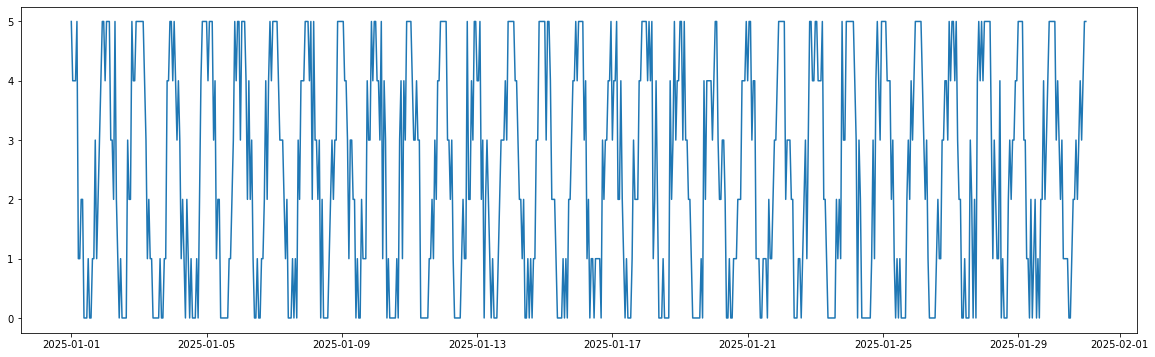

In [31]:
plot_x_vs_y(x = df_psychogeriatric_clinic['time_of_day'], y = df_psychogeriatric_clinic['doctors_available'])

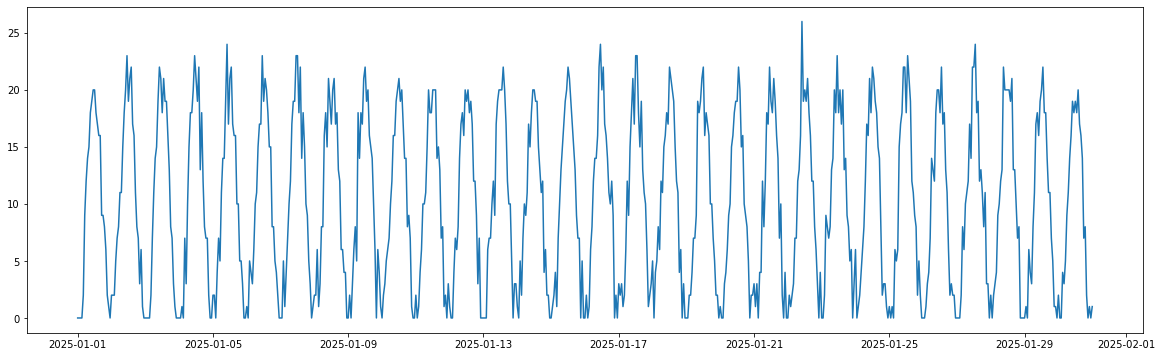

In [32]:
plot_x_vs_y(x = df_memory_clinic['time_of_day'], y = df_psychogeriatric_clinic['patients_waiting'])

In [33]:
# Join the 3 dataframes to create one large dataframe

df_all= pd.concat([df_mood_disorders,df_memory_clinic,df_psychogeriatric_clinic])
df_all = df_all.sort_values(by=['time_of_day', 'department'], ignore_index = True)
df_all

,time_of_day,department,wait_time,patients_waiting,doctors_available,satisfaction_score
0,2025-01-01 00:00:00,Memory Clinic,7.3,0,3,4.3
1,2025-01-01 00:00:00,Mood Disorders,13.6,0,5,4.9
2,2025-01-01 00:00:00,Psychogeriatric Clinic,0.8,0,5,4.7
3,2025-01-01 01:00:00,Memory Clinic,11.1,1,5,5.0
4,2025-01-01 01:00:00,Mood Disorders,2.2,0,5,3.6
...,...,...,...,...,...,...
2158,2025-01-30 23:00:00,Mood Disorders,0.9,0,5,4.9
2159,2025-01-30 23:00:00,Psychogeriatric Clinic,0.0,0,5,4.0
2160,2025-01-31 00:00:00,Memory Clinic,0.0,1,5,5.0
2161,2025-01-31 00:00:00,Mood Disorders,0.0,0,4,5.0


In [34]:
# Saving the data to a csv file
df_all.to_csv("synthetic_data.csv", index=False)